In [2]:
'''https://github.com/pymc-devs/pymc3/blob/master/docs/notebooks/getting_started.ipynb'''

'https://github.com/pymc-devs/pymc3/blob/master/docs/notebooks/getting_started.ipynb'

In [3]:
##Generate data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [30]:
np.random.seed(123)

alpha, sigma = 1, 1
beta = [1, 2.5]
#y = 1 + x1 + 2.5x2

size = 100

x1 = np.random.randn(size)
x2 = np.random.rand(size)

Y = alpha + beta[0] * x1 + beta[1] * x2 + np.random.rand(size) * sigma

(array([  2.,   3.,   9.,  17.,  15.,  17.,  10.,  13.,  12.,   2.]),
 array([-0.95991735, -0.45257126,  0.05477483,  0.56212092,  1.06946701,
         1.5768131 ,  2.0841592 ,  2.59150529,  3.09885138,  3.60619747,
         4.11354356]),
 <a list of 10 Patch objects>)

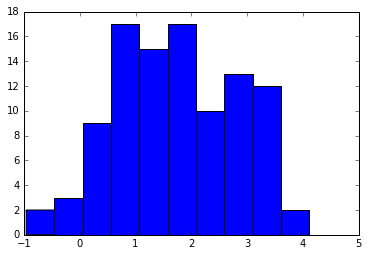

In [11]:
plt.hist(Y)

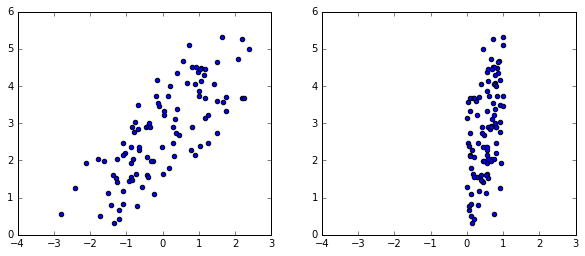

In [31]:
fig, axes = plt.subplots(1, 2, sharex = True, figsize= (10,4))
axes[0].scatter(x1, Y)
axes[1].scatter(x2, Y)

In [13]:
from pymc3 import Model, Normal, HalfNormal

In [32]:
with Model() as basic_model:
    alpha = Normal("alpha", mu = 0, sd = 10)
    beta = Normal("beta", mu = 0, sd = 10, shape = 2)
    sigma = HalfNormal("sigma", sd = 1)
    
    mu = alpha + beta[0] * x1 + beta[1] * x2
    
    Y_obs = Normal("Y_obs", mu = mu, sd = sigma, observed = Y)

Applied log-transform to sigma and added transformed sigma_log to model.


In [16]:
from pymc3 import find_MAP

In [17]:
map_estimate = find_MAP(model = basic_model)

In [18]:
map_estimate

{'alpha': array(0.0),
 'beta': array([ 0.,  0.]),
 'sigma_log': array(-2.348262432214562e-08)}

In [33]:
from scipy import optimize 
from pymc3 import sample
with basic_model:
    start = find_MAP(fmin = optimize.fmin_powell)
    trace = sample(2000, start = start)

Assigned NUTS to alpha
Assigned NUTS to beta
Assigned NUTS to sigma_log
 [-----------------100%-----------------] 2000 of 2000 complete in 5.4 sec

In [23]:
trace['alpha'][-5:]

array([  0.95808526,   9.64469458,  15.19787053,  10.96758074,  23.23067756])

In [25]:
trace['alpha'].shape

(2000,)

(array([  14.,   60.,  172.,  393.,  503.,  442.,  275.,  121.,   17.,    3.]),
 array([-31.80840035, -25.07872759, -18.34905482, -11.61938206,
         -4.88970929,   1.83996347,   8.56963623,  15.299309  ,
         22.02898176,  28.75865453,  35.48832729]),
 <a list of 10 Patch objects>)

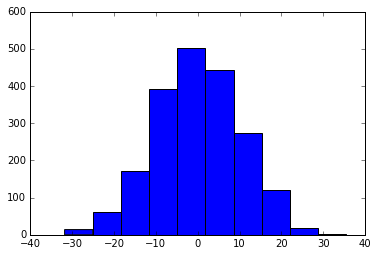

In [26]:
plt.hist(trace['alpha'])

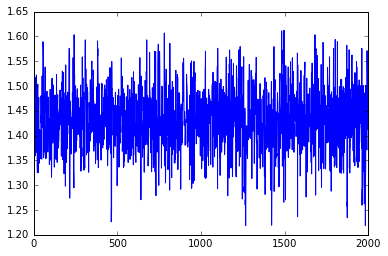

In [34]:
plt.plot(np.arange(2000), trace['alpha'])

In [28]:
from pymc3 import traceplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa5ebad8c>,
        <matplotlib.axes._subplots.AxesSubplot object at 0xa5ef4b6c>]], dtype=object)

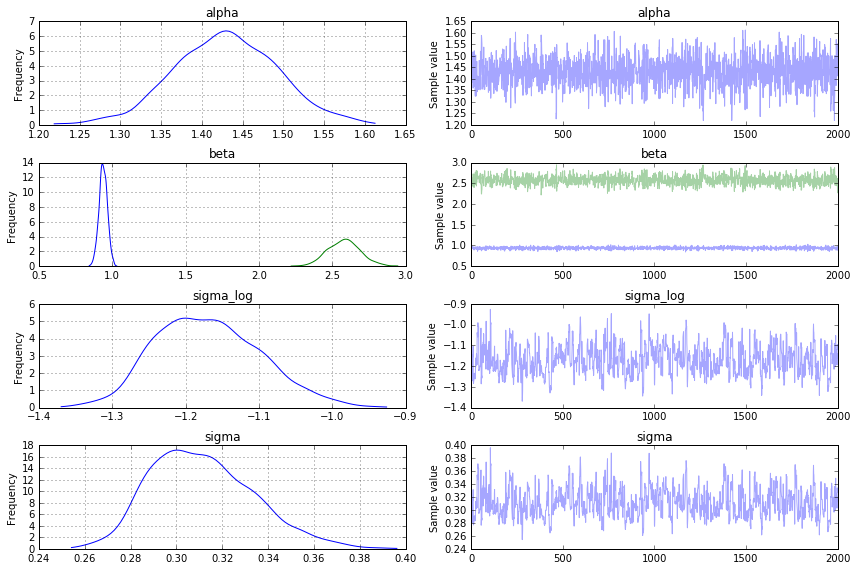

In [35]:
traceplot(trace)